In [238]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

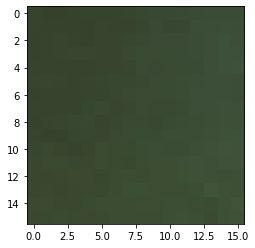

In [239]:
img = mpimg.imread('pred_img.png')
imgplot = plt.imshow(img)
plt.show()

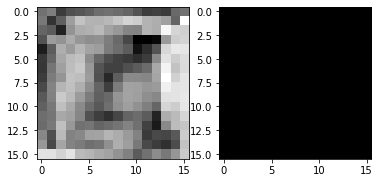

In [240]:
bldg = np.loadtxt('bldg.npy')
bldg_targ = np.loadtxt('bldg-targ.npy')
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(bldg, cmap='gray')
ax[1].imshow(bldg_targ, cmap='gray')

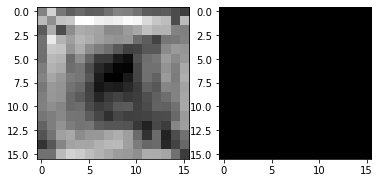

In [242]:
back = np.loadtxt('back.npy')
back_targ = np.loadtxt('back-targ.npy')
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(back, cmap='gray')
ax[1].imshow(back_targ, cmap='gray')

In [ ]:
out = np.loadtxt('out.npy')
out_targ = np.loadtxt('out-targ.npy')
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(out, cmap='gray')
ax[1].imshow(out_targ, cmap='gray')

In [ ]:
pred = np.ones(shape=bldg.shape)

In [ ]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [ ]:
bldg_sig = sigmoid(bldg) * 255
bldg_sig = bldg_sig.astype(np.uint16)
_,bldg_th = cv2.threshold(bldg_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
back_sig = sigmoid(back) * 255
back_sig = back_sig.astype(np.uint16)
_,back_th = cv2.threshold(back_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
out_sig = sigmoid(out) * 255
out_sig = out_sig.astype(np.uint16)
_,out_th = cv2.threshold(out_sig,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
out_th = out_th.astype(np.bool)
back_th = back_th.astype(np.bool)
bldg_th = bldg_th.astype(np.bool)

In [ ]:
pred[bldg_th] = 1
pred[back_th] = 0
pred[out_th] = 1
plt.imshow(pred, cmap="gray")